In [73]:
import pandas as pd
import numpy as np
from xml.dom import minidom
import matplotlib.pyplot as plt

In [57]:

def xml(xml_path):
    
    
    
# parse an xml file by name
    mydoc = minidom.parse(xml_path)

    items = mydoc.getElementsByTagName('item')

# one specific item attribute
    #print('Item #2 attribute:')
    #print(items[1].attributes['name'].value)

# all item attributes
    #print('\nAll attributes:')
    

    for elem in items:
        veri=[]
        sutun=[]

        #print(elem.attributes['name'].value)
        
        #print(elem.firstChild.data)
        for i in range(len(items)):
            
            sutun.append(items[i].firstChild.data)
        
            veri.append(items[i].attributes['name'].value)
    
    """# one specific item's data
    print('\nItem #2 data:')
    print(items[1].firstChild.data)
    print(items[1].childNodes[0].data)"""
    

        
    
    X=np.transpose(veri)

    Y=np.transpose(sutun)
    Y = np.array([Y],np.float32)
    X=X.astype("object")

    return (X,Y)

In [87]:
X=xml("my_intersection.stats.xml")
X[1]

array([[8.993000e+03, 9.247100e+04, 1.028000e+01, 2.024660e+05,
        2.251000e+01, 7.956000e+03, 8.800000e-01, 4.399600e+05,
        4.892000e+01, 1.873337e+06, 2.083100e+02, 5.960000e+00,
        2.907000e+01, 1.379000e+01, 3.350000e+00, 2.454000e+01]],
      dtype=float32)

In [59]:


static=pd.DataFrame(data=X[1],columns=X[0])
static

,totalNumberOfVehicles,totalDepartureDelay,averageDepartureDelay,totalWaitingTime,averageVehicularWaitingTime,totalNumberOfStop,averageNumberOfStop,totalTravelTime,averageVehicularTravelTime,totalTravelLength,averageVehicularTravelLength,averageVehicularTravelSpeed,SDTravelTime,SDLength,SDSpeed,SDWaitTime
0,8993.0,92471.0,10.28,202466.0,22.51,7956.0,0.88,439960.0,48.919998,1873337.0,208.309998,5.96,29.07,13.79,3.35,24.540001


In [60]:
Y=xml("my_intersection_actuated.stats.xml")

actuated=pd.DataFrame(data=Y[1],columns=Y[0])
actuated

,totalNumberOfVehicles,totalDepartureDelay,averageDepartureDelay,totalWaitingTime,averageVehicularWaitingTime,totalNumberOfStop,averageNumberOfStop,totalTravelTime,averageVehicularTravelTime,totalTravelLength,averageVehicularTravelLength,averageVehicularTravelSpeed,SDTravelTime,SDLength,SDSpeed,SDWaitTime
0,8993.0,88440.0,9.83,132049.0,14.68,6863.0,0.76,364904.0,40.580002,1873337.0,208.309998,6.73,24.719999,13.79,3.04,21.1


In [61]:
Z=xml("my_intersection_delay_based.stats.xml")

delay_based=pd.DataFrame(data=Z[1],columns=Z[0])
delay_based

,totalNumberOfVehicles,totalDepartureDelay,averageDepartureDelay,totalWaitingTime,averageVehicularWaitingTime,totalNumberOfStop,averageNumberOfStop,totalTravelTime,averageVehicularTravelTime,totalTravelLength,averageVehicularTravelLength,averageVehicularTravelSpeed,SDTravelTime,SDLength,SDSpeed,SDWaitTime
0,8993.0,90337.0,10.05,126005.0,14.01,5694.0,0.63,352336.0,39.18,1873337.0,208.309998,7.04,24.42,13.79,3.18,20.92


In [167]:
df=pd.concat([static, actuated,delay_based], axis =0,ignore_index =True)
df=df.rename(index={0: 'Static',1:'Actuated',2:'Delay Based'})
df

,totalNumberOfVehicles,totalDepartureDelay,averageDepartureDelay,totalWaitingTime,averageVehicularWaitingTime,totalNumberOfStop,averageNumberOfStop,totalTravelTime,averageVehicularTravelTime,totalTravelLength,averageVehicularTravelLength,averageVehicularTravelSpeed,SDTravelTime,SDLength,SDSpeed,SDWaitTime
Static,8993.0,92471.0,10.28,202466.0,22.51,7956.0,0.88,439960.0,48.919998,1873337.0,208.309998,5.96,29.070000,13.79,3.35,24.540001
Actuated,8993.0,88440.0,9.83,132049.0,14.68,6863.0,0.76,364904.0,40.580002,1873337.0,208.309998,6.73,24.719999,13.79,3.04,21.100000
Delay Based,8993.0,90337.0,10.05,126005.0,14.01,5694.0,0.63,352336.0,39.180000,1873337.0,208.309998,7.04,24.420000,13.79,3.18,20.920000


In [168]:
df_new=df[['totalNumberOfVehicles','totalDepartureDelay','totalWaitingTime','totalNumberOfStop','totalTravelTime']]

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Static to Delay Based
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   totalNumberOfVehicles         3 non-null      float32
 1   totalDepartureDelay           3 non-null      float32
 2   averageDepartureDelay         3 non-null      float32
 3   totalWaitingTime              3 non-null      float32
 4   averageVehicularWaitingTime   3 non-null      float32
 5   totalNumberOfStop             3 non-null      float32
 6   averageNumberOfStop           3 non-null      float32
 7   totalTravelTime               3 non-null      float32
 8   averageVehicularTravelTime    3 non-null      float32
 9   totalTravelLength             3 non-null      float32
 10  averageVehicularTravelLength  3 non-null      float32
 11  averageVehicularTravelSpeed   3 non-null      float32
 12  SDTravelTime                  3 non-null      float32
 13 

In [170]:

#df_new=df_new.rename(index={0: 'Static',1:'Actuated',2:'Delay Based'})
df_new

,totalNumberOfVehicles,totalDepartureDelay,totalWaitingTime,totalNumberOfStop,totalTravelTime
Static,8993.0,92471.0,202466.0,7956.0,439960.0
Actuated,8993.0,88440.0,132049.0,6863.0,364904.0
Delay Based,8993.0,90337.0,126005.0,5694.0,352336.0


Text(0.5, 1.0, 'Toplam')

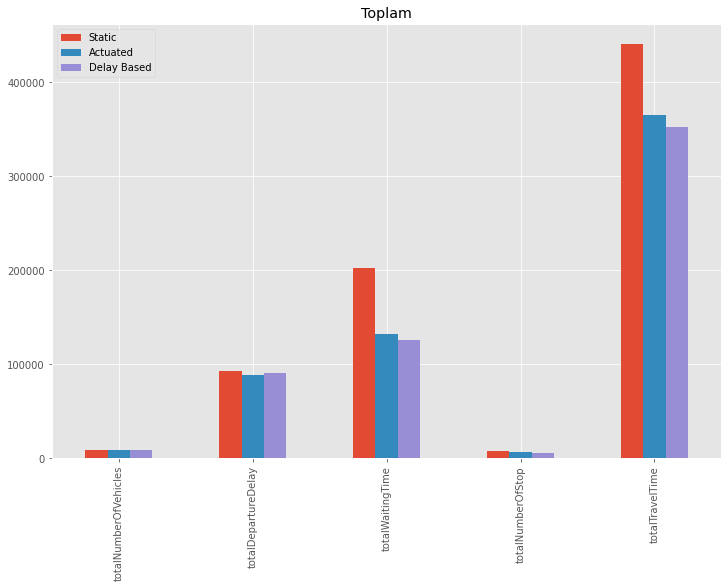

In [171]:
plt.style.use('ggplot')
df_new.T.plot(kind='bar',figsize=(12,8))
plt.title("Toplam")

In [172]:
df.drop(['totalNumberOfVehicles','totalDepartureDelay','totalWaitingTime','totalNumberOfStop','totalTravelTime','totalTravelLength','averageVehicularTravelLength'],axis=1, inplace=True)


Text(0.5, 1.0, 'Ortalama')

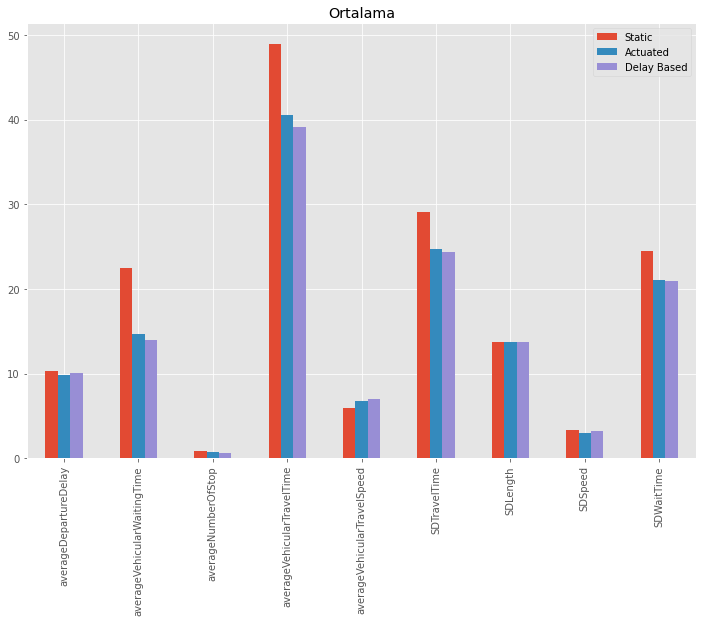

In [173]:
#plt.style.use('ggplot')
df.T.plot(kind='bar',figsize=(12,8))
plt.title("Ortalama")